In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from random import sample
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import shutil
from tensorflow.keras.applications import VGG19

In [2]:
train_data_path ="C:/Users/Ahmed Mohamed/Desktop/AGR_CNN/Data/Train"
valid_data_path ="C:/Users/Ahmed Mohamed/Desktop/AGR_CNN/Data/Valid"
test_data_path  ="C:/Users/Ahmed Mohamed/Desktop/AGR_CNN/Data/Test"

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Potato early blight'),
  Text(1, 0, 'Potato healthy'),
  Text(2, 0, 'Potato late blight'),
  Text(3, 0, 'Tomato bacterial spot'),
  Text(4, 0, 'tomato early blight'),
  Text(5, 0, 'Tomato healthy'),
  Text(6, 0, 'Tomato late blight'),
  Text(7, 0, 'Tomato leaf mold'),
  Text(8, 0, 'Tomato mosaic virus'),
  Text(9, 0, 'Tomato septoria spot'),
  Text(10, 0, 'Tomato yellow leaf curl')])

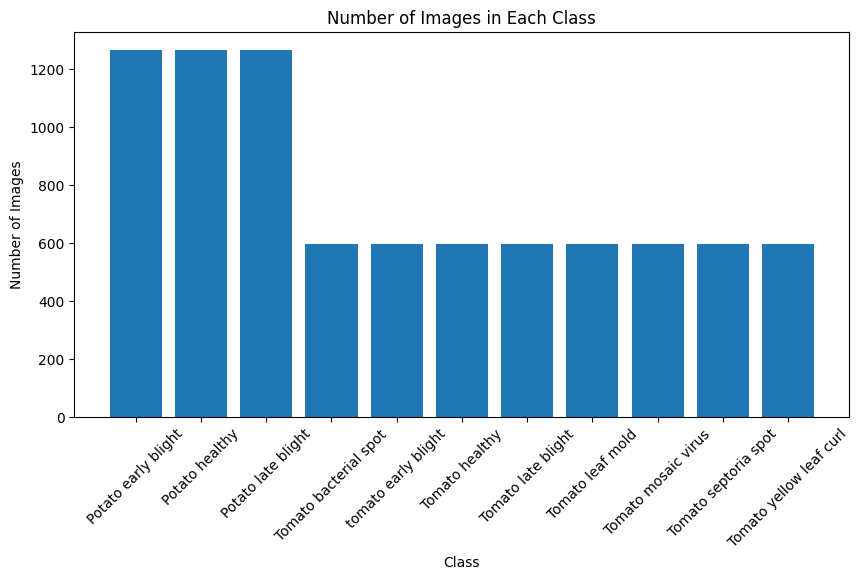

In [3]:
class_counts = {}

for class_name in os.listdir(train_data_path):
    class_path = os.path.join(train_data_path, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
plt.figure(figsize=(10, 5))
plt.bar(df['Class'], df['Count'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Potato early blight'),
  Text(1, 0, 'Potato healthy'),
  Text(2, 0, 'Potato late blight'),
  Text(3, 0, 'Tomato bacterial spot'),
  Text(4, 0, 'Tomato early blight'),
  Text(5, 0, 'Tomato healthy'),
  Text(6, 0, 'Tomato late blight'),
  Text(7, 0, 'Tomato leaf mold'),
  Text(8, 0, 'Tomato mosaic virus'),
  Text(9, 0, 'Tomato septoria spot'),
  Text(10, 0, 'Tomato yellow leaf curl')])

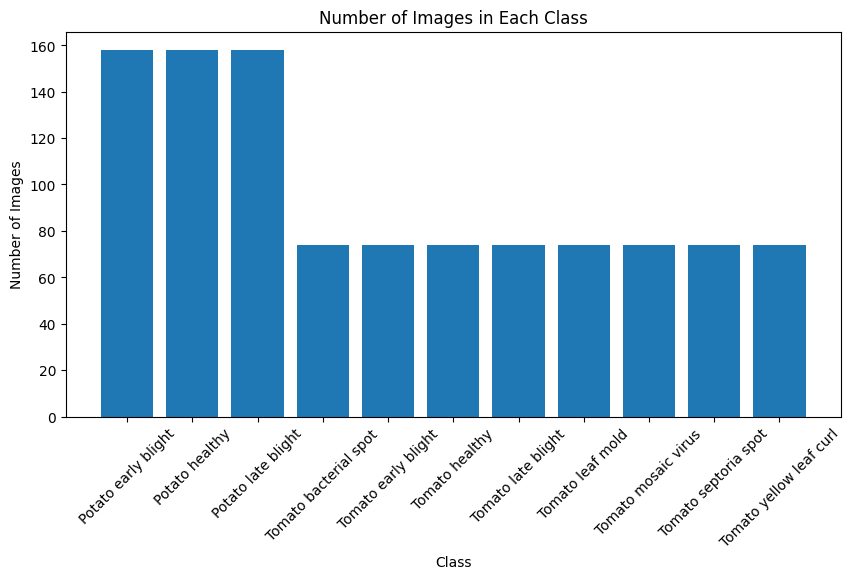

In [4]:
class_counts = {}

for class_name in os.listdir(valid_data_path):
    class_path = os.path.join(valid_data_path, class_name)
    if os.path.isdir(class_path):
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])
plt.figure(figsize=(10, 5))
plt.bar(df['Class'], df['Count'])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=45)

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
IMG_SHAPE = (256,256)
BATCH_SIZE = 32
train_data = datagen.flow_from_directory(train_data_path,
                                         target_size=IMG_SHAPE,
                                         batch_size=BATCH_SIZE,
                                         class_mode="categorical",
                                         color_mode="rgb",
                                         shuffle=True)
valid_data = datagen.flow_from_directory(valid_data_path,
                                         target_size=IMG_SHAPE,
                                         batch_size=BATCH_SIZE,
                                         class_mode="categorical",
                                         color_mode="rgb",
                                         shuffle=False)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_data_path,
    target_size=IMG_SHAPE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Found 8574 images belonging to 11 classes.
Found 1066 images belonging to 11 classes.
Found 1066 images belonging to 11 classes.


In [6]:
class_names = list(train_data.class_indices.keys())
class_names

['Potato early blight',
 'Potato healthy',
 'Potato late blight',
 'Tomato bacterial spot',
 'Tomato healthy',
 'Tomato late blight',
 'Tomato leaf mold',
 'Tomato mosaic virus',
 'Tomato septoria spot',
 'Tomato yellow leaf curl',
 'tomato early blight']

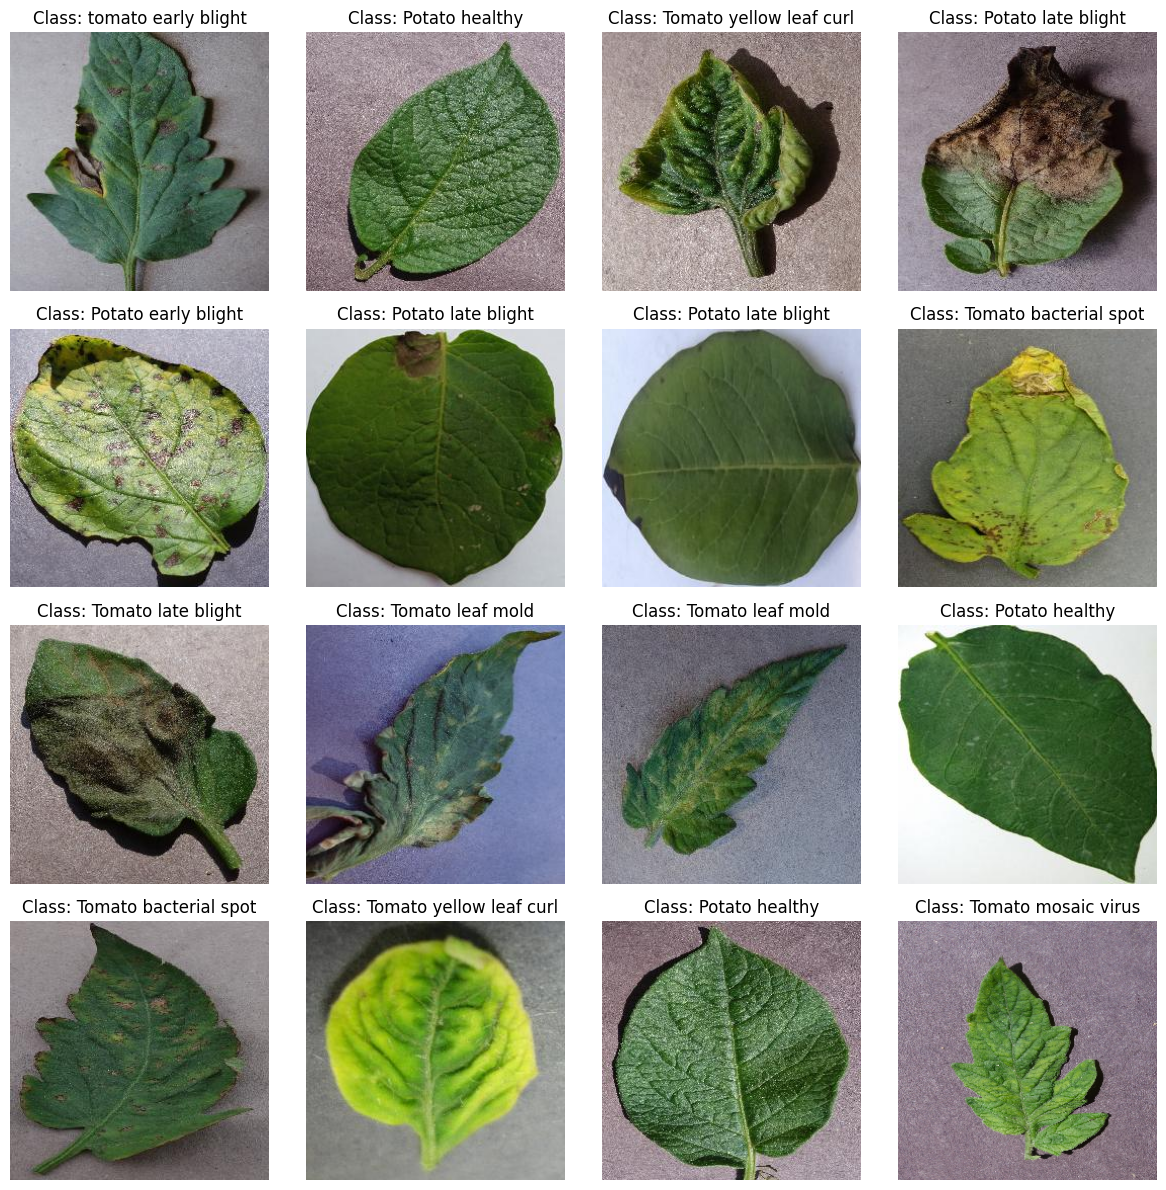

In [ ]:
images, labels = next(train_data)
num_images = 16 

plt.figure(figsize=(12, 12)) 
for i in range(num_images):
    plt.subplot(4, 4, i + 1) 
    plt.imshow(images[i]) 
    plt.title('Class: {}'.format(class_names[labels[i].argmax()]))
    plt.axis('off') 

plt.tight_layout()
plt.show()

In [9]:
base_model = VGG19(weights=None, include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False

In [10]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
outputs = tf.keras.layers.Dense(11, activation='softmax')(x)
model = tf.keras.Model(inputs=base_model.input, outputs=outputs)

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, mode="max")
checkpoint = ModelCheckpoint('Best_Weight_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')
history = model.fit(
    train_data,
    validation_data=valid_data,
    epochs=40,
    callbacks=[early_stopping,checkpoint]
)

d:\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
268/268 ━━━━━━━━━━━━━━━━━━━━ 926s 3s/step - accuracy: 0.1563 - loss: 2.3470 - val_accuracy: 0.1482 - val_loss: 2.3318
Epoch 2/40
268/268 ━━━━━━━━━━━━━━━━━━━━ 970s 4s/step - accuracy: 0.2054 - loss: 2.3061 - val_accuracy: 0.1482 - val_loss: 2.3171
Epoch 3/40
 62/268 ━━━━━━━━━━━━━━━━━━━━ 10:49 3s/step - accuracy: 0.2138 - loss: 2.3093

KeyboardInterrupt: 